
# Pausing and Resuming an Animation

This example showcases:

- using the Animation.pause() method to pause an animation.
- using the Animation.resume() method to resume an animation.

<div class="alert alert-info"><h4>Note</h4><p>This example exercises the interactive capabilities of Matplotlib, and this
    will not appear in the static documentation. Please run this code on your
    machine to see the interactivity.

    You can copy and paste individual parts, or download the entire example
    using the link at the bottom of the page.</p></div>

Output generated via `matplotlib.animation.Animation.to_jshtml`.


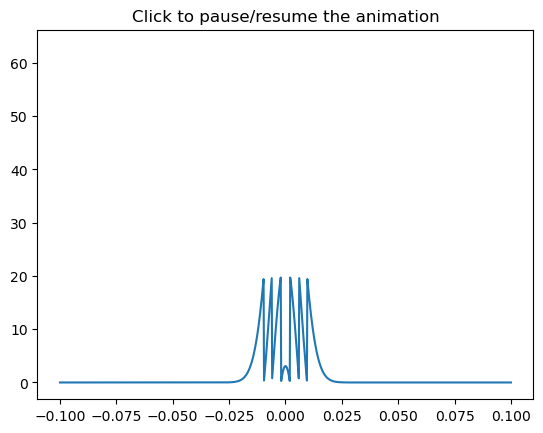

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation


class PauseAnimation:
    def __init__(self):
        fig, ax = plt.subplots()
        ax.set_title('Click to pause/resume the animation')
        x = np.linspace(-0.1, 0.1, 1000)

        # Start with a normal distribution
        self.n0 = (1.0 / ((4 * np.pi * 2e-4 * 0.1) ** 0.5)
                   * np.exp(-x ** 2 / (4 * 2e-4 * 0.1)))
        self.p, = ax.plot(x, self.n0)

        self.animation = animation.FuncAnimation(
            fig, self.update, frames=200, interval=50, blit=True)
        self.paused = False

        fig.canvas.mpl_connect('button_press_event', self.toggle_pause)

    def toggle_pause(self, *args, **kwargs):
        if self.paused:
            self.animation.resume()
        else:
            self.animation.pause()
        self.paused = not self.paused

    def update(self, i):
        self.n0 += i / 100 % 5
        self.p.set_ydata(self.n0 % 20)
        return (self.p,)


pa = PauseAnimation()
plt.show()